# ===================
# Step 1: Load the Wine.csv file
# ===================

In [2]:
import pandas as pd

df = pd.read_csv('wine.csv')

# ===================
# Step 2: Print number of instances, attributes, and first 5 rows
# ===================

In [3]:
print("Number of instances:", df.shape[0])
print("Number of attributes:", df.shape[1])
print(df.head())

Number of instances: 178
Number of attributes: 14
   Class  Alcohol  Malic acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                  

# ===================
# Step 3: Split the dataset into train and test sets
#     (Assuming the class label column is named "Class")
# ===================

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=181, stratify=y
)

# ===================
# Step 4: Standardize data
# ===================

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================
# Step 5: Fit SVM model on the train set
# ===================

In [6]:
from sklearn.svm import SVC

svm_model = SVC(random_state=181)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=181)

# ===================
# Step 6: Print the confusion matrix and accuracy for the original data
# ===================

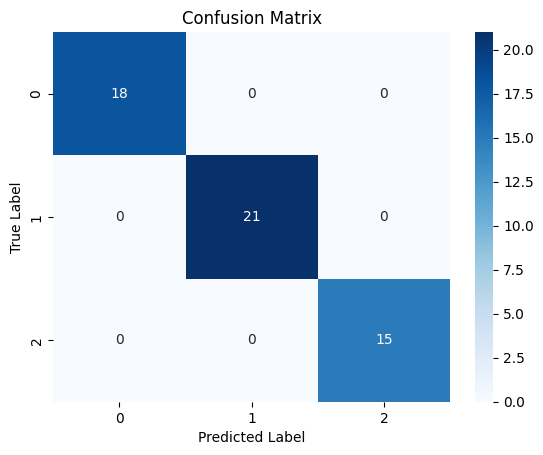

Accuracy: 100.0%


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"Accuracy: {acc * 100}%")

# ===================
# Step 7: Apply PCA to the standardized dataset
#     (Using 2 components to allow 2D plotting later)
# ===================

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ===================
# Step 8: SVM on PCA-transformed dataset and print CM & accuracy
# ===================

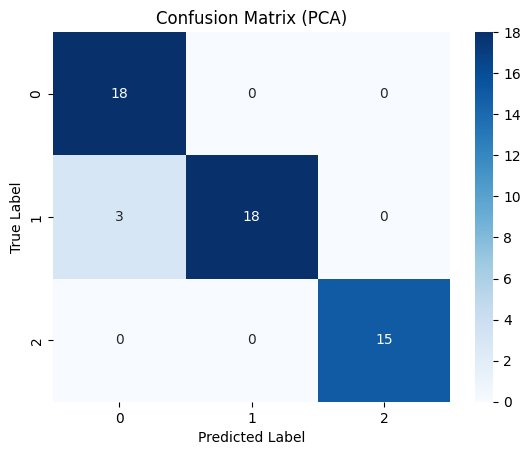

Accuracy (PCA): 94.44444444444444%


In [19]:
svm_pca = SVC(random_state=181)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

sns.heatmap(cm_pca, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (PCA)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(f"Accuracy (PCA): {acc_pca * 100}%")

# ===================
# Step 9: Using the first 2 PCA components, plot two 2D graphs
#   1) Train set color-coded by class
#   2) Train set with the support vectors (color-coded by class)
# ===================

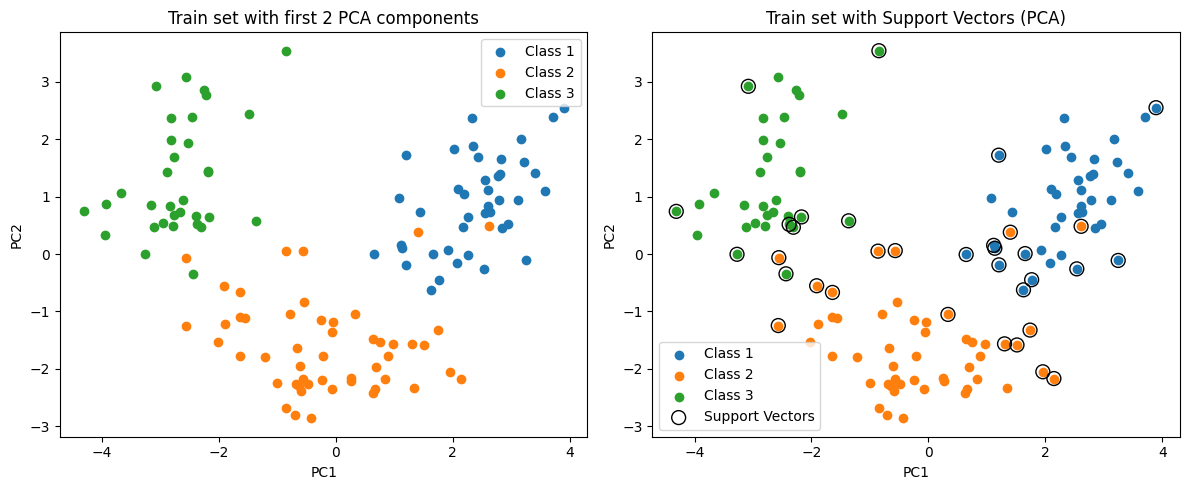

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 2 subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ================================
# Plot 1: Train set color-coded by class
# ================================
for label in np.unique(y_train):
    ax1.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                label=f'Class {label}')
ax1.set_title("Train set with first 2 PCA components")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.legend()

# ================================
# Plot 2: Train set with support vectors
# ================================
sv_indices = svm_pca.support_  # Get the indices of support vectors

for label in np.unique(y_train):
    ax2.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                label=f'Class {label}')

# Highlight support vectors
ax2.scatter(X_train_pca[sv_indices, 0],
            X_train_pca[sv_indices, 1],
            label='Support Vectors',
            facecolors='none',
            edgecolors='k',
            s=100)

ax2.set_title("Train set with Support Vectors (PCA)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()

# Adjust spacing to avoid overlap
plt.tight_layout()
plt.show()


# ===================
# Step 10: Apply LDA to reduce the dimensionality of the standardized dataset
#     (Using 2 components for 2D visualization)
# ===================

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# ===================
# Step 11: SVM on LDA-transformed dataset and print CM & accuracy
# ===================

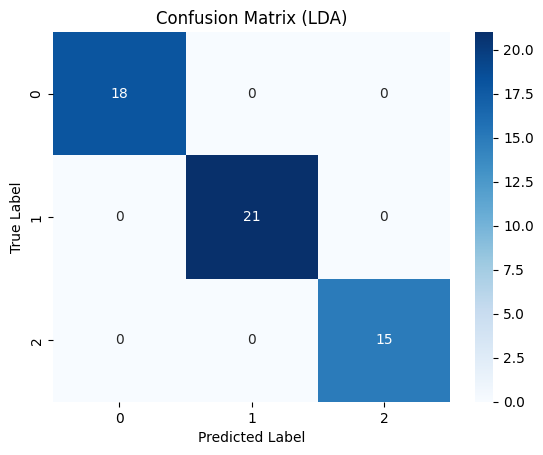

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
Accuracy (LDA): 100.0%


In [17]:
svm_lda = SVC(random_state=181)
svm_lda.fit(X_train_lda, y_train)

y_pred_lda = svm_lda.predict(X_test_lda)
cm_lda = confusion_matrix(y_test, y_pred_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)

sns.heatmap(cm_lda, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix (LDA)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(cm_lda)
print(f"Accuracy (LDA): {acc_lda * 100}%")

# ===================
# Step 12: Plot two 2D graphs for the LDA-transformed dataset
#   1) Train set color-coded by class
#   2) Train set with the support vectors (color-coded by class)
# ===================

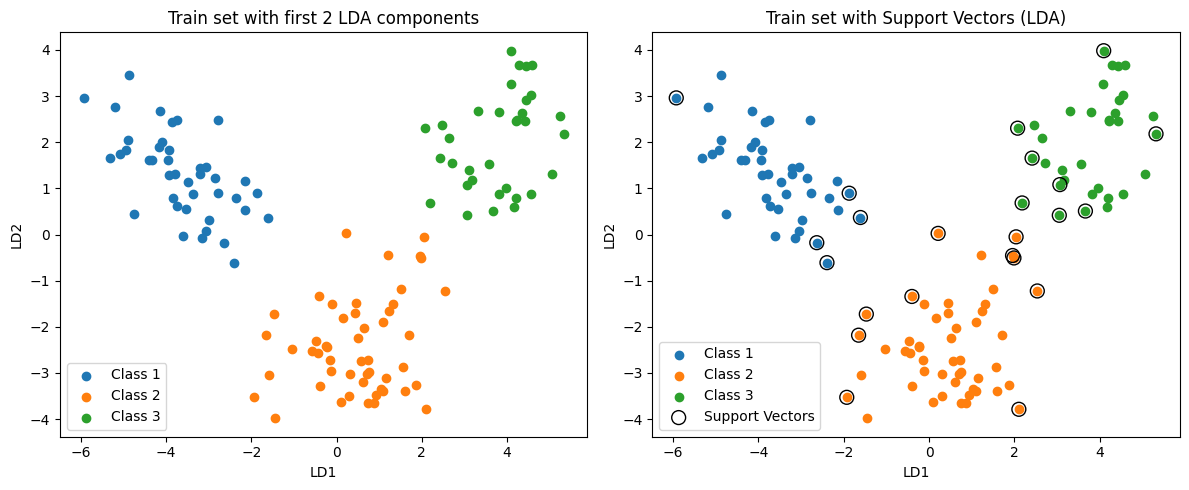

In [21]:
# Create a figure with 2 subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Train set color-coded by class (LDA)
for label in np.unique(y_train):
    ax1.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                label=f'Class {label}')
ax1.set_title("Train set with first 2 LDA components")
ax1.set_xlabel("LD1")
ax1.set_ylabel("LD2")
ax1.legend()

# Plot 2: Train set with support vectors (LDA)
sv_indices_lda = svm_lda.support_  # Get the indices of support vectors
for label in np.unique(y_train):
    ax2.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                label=f'Class {label}')

# Highlight support vectors
ax2.scatter(X_train_lda[sv_indices_lda, 0],
            X_train_lda[sv_indices_lda, 1],
            label='Support Vectors',
            facecolors='none',
            edgecolors='k',
            s=100)

ax2.set_title("Train set with Support Vectors (LDA)")
ax2.set_xlabel("LD1")
ax2.set_ylabel("LD2")
ax2.legend()

# Use tight_layout() to adjust spacing
plt.tight_layout()
plt.show()
